# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Traffic sign image shape
image_shape = X_train.shape[1:]

# Unique classes/labels in the dataset.
classes = set(y_train)
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory Visualization

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

#### Image Classes

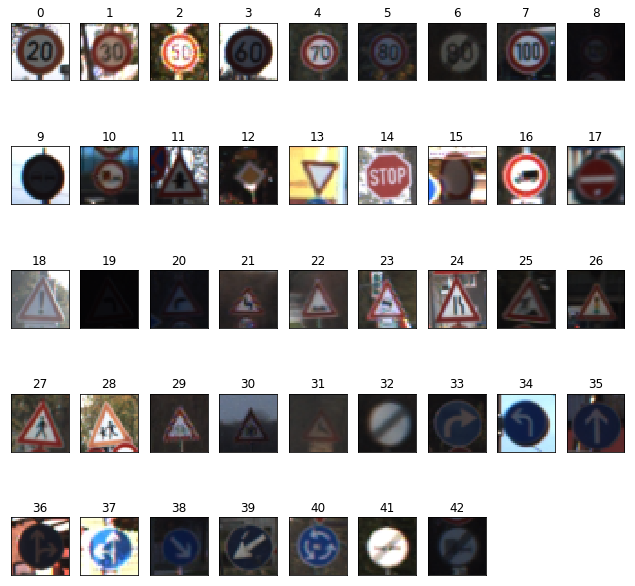

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

h = 5
w = 9
fig, axes = plt.subplots(h, w, figsize=(11,11))
for c in classes:
    index = random.choice(np.where(y_train == c)[0])
    i = X_train[index].squeeze()
    axes[int(c/w),c%w].imshow(i, cmap="gray")
    axes[int(c/w),c%w].set_title(c)
    axes[int(c/w),c%w].set_xticks([])
    axes[int(c/w),c%w].set_yticks([])
    
fig.delaxes(axes[4,8])
fig.delaxes(axes[4,7])


#### Class Count

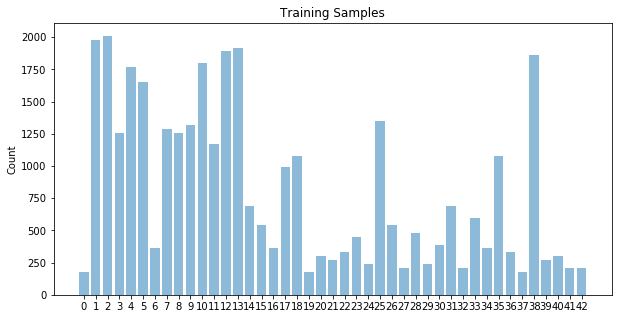

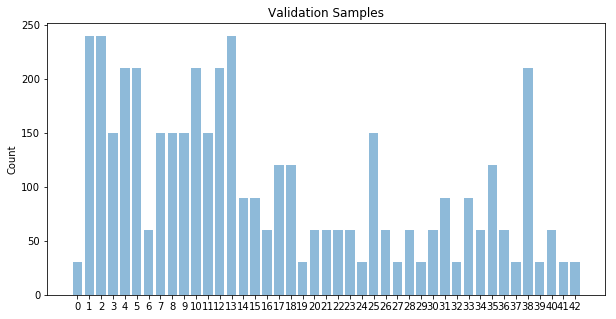

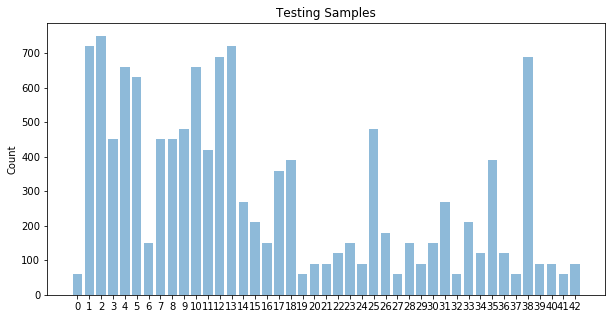

In [4]:
unique, count = np.unique(y_train, return_counts=True)
y_pos = np.arange(len(unique))
plt.figure(figsize=(10,5))
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Count')
plt.title('Training Samples')
plt.show()

unique, count = np.unique(y_valid, return_counts=True)
y_pos = np.arange(len(unique))
plt.figure(figsize=(10,5))
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Count')
plt.title('Validation Samples')
plt.show()

unique, count = np.unique(y_test, return_counts=True)
y_pos = np.arange(len(unique))
plt.figure(figsize=(10,5))
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, unique)
plt.ylabel('Count')
plt.title('Testing Samples')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Normalization: rather than normalize images during preprocessing, I chose to include batch normalization in my model as described in [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

### Model Architecture

#### Layers

* Layer 1: 3x3 Convolution
* 1 Layer 2: 1x1 Convolution
* Layer 3: 3x3 Convolution
* Layer 4: Inception Module
* Layer 5: Downsampling Convolution
* Layer 6: Inception Module
* Layer 7: Downsampling Convolution
* Layer 8: Inception Module
* Layer 9: 3x3 Convolution
* Layer 10: Fully-Connected



#### Inception Modules Structure
**Stack 1:**
* Layer 1: 1x1 Convolution

**Stack 2:**
* Layer 1: 1x1 Convolution
* Layer 2: 3x3 Convolution

**Stack 3:**
* Layer 1: 1x1 Convolution
* Layer 2: 3x3 Convolution


#### Design Discussion

I did a lot of reading and research before starting work on this model. I was particularly intrigued by [Inception Modules](https://arxiv.org/abs/1409.4842), [Batch Normalization](https://arxiv.org/abs/1502.03167) and [The All Convolutional Net](https://arxiv.org/abs/1412.6806). So, I incorporated concepts (rather haphazardly) from each when assembling this architecture.

It was a lot of fun to put what I learned from the papers into practice. However, it's worth noting that when you try so many new things, all at once, you can easily lose yourself in all the variability.

In [5]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tensorflow.contrib.layers import batch_norm


def InceptionBN10(x,p):
    mu = 0
    sigma = 0.1
    
    weights = {
        '1-conv': tf.Variable(tf.truncated_normal([3, 3, 3, 8], mean=mu, stddev=sigma)),
        '2-conv': tf.Variable(tf.truncated_normal([1, 1, 8, 16], mean=mu, stddev=sigma)),
        '3-conv': tf.Variable(tf.truncated_normal([3, 3, 16, 32], mean=mu, stddev=sigma)),
        '4-incept-stack1-conv1': tf.Variable(tf.truncated_normal([1, 1, 32, 8], mean=mu, stddev=sigma)),
        '4-incept-stack2-conv1': tf.Variable(tf.truncated_normal([1, 1, 32, 12], mean=mu, stddev=sigma)),
        '4-incept-stack2-conv2': tf.Variable(tf.truncated_normal([3, 3, 12, 24], mean=mu, stddev=sigma)),
        '4-incept-stack3-conv1': tf.Variable(tf.truncated_normal([1, 1, 32, 4], mean=mu, stddev=sigma)),
        '4-incept-stack3-conv2': tf.Variable(tf.truncated_normal([5, 5, 4, 8], mean=mu, stddev=sigma)),
        '5-down-conv': tf.Variable(tf.truncated_normal([3, 3, 40, 40], mean=mu, stddev=sigma)),
        '6-incept-stack1-conv1': tf.Variable(tf.truncated_normal([1, 1, 40, 16], mean=mu, stddev=sigma)),
        '6-incept-stack2-conv1': tf.Variable(tf.truncated_normal([1, 1, 40, 16], mean=mu, stddev=sigma)),
        '6-incept-stack2-conv2': tf.Variable(tf.truncated_normal([3, 3, 16, 24], mean=mu, stddev=sigma)),
        '6-incept-stack3-conv1': tf.Variable(tf.truncated_normal([1, 1, 40, 4], mean=mu, stddev=sigma)),
        '6-incept-stack3-conv2': tf.Variable(tf.truncated_normal([5, 5, 4, 12], mean=mu, stddev=sigma)),
        '7-down-conv': tf.Variable(tf.truncated_normal([3, 3, 52, 52], mean=mu, stddev=sigma)),
        '8-incept-stack1-conv1': tf.Variable(tf.truncated_normal([1, 1, 52, 32], mean=mu, stddev=sigma)),
        '8-incept-stack2-conv1': tf.Variable(tf.truncated_normal([1, 1, 52, 20], mean=mu, stddev=sigma)),
        '8-incept-stack2-conv2': tf.Variable(tf.truncated_normal([3, 3, 20, 40], mean=mu, stddev=sigma)),
        '8-incept-stack3-conv1': tf.Variable(tf.truncated_normal([1, 1, 52, 4], mean=mu, stddev=sigma)),
        '8-incept-stack3-conv2': tf.Variable(tf.truncated_normal([5, 5, 4, 16], mean=mu, stddev=sigma)),
        '9-conv': tf.Variable(tf.truncated_normal([3, 3, 88, 4], mean=mu, stddev=sigma)),
        '10-fc': tf.Variable(tf.truncated_normal([256, 43], mean=mu, stddev=sigma))
    }

    biases = {
        '1-conv': tf.zeros(8),
        '2-conv': tf.zeros(16),
        '3-conv': tf.zeros(32),
        '4-incept-stack1-conv1': tf.zeros(8),
        '4-incept-stack2-conv1': tf.zeros(12),
        '4-incept-stack2-conv2': tf.zeros(24),
        '4-incept-stack3-conv1': tf.zeros(4),
        '4-incept-stack3-conv2': tf.zeros(8),
        '5-down-conv': tf.zeros(40),
        '6-incept-stack1-conv1': tf.zeros(16),
        '6-incept-stack2-conv1': tf.zeros(16),
        '6-incept-stack2-conv2': tf.zeros(24),
        '6-incept-stack3-conv1': tf.zeros(4),
        '6-incept-stack3-conv2': tf.zeros(12),
        '7-down-conv': tf.zeros(52),
        '8-incept-stack1-conv1': tf.zeros(32),
        '8-incept-stack2-conv1': tf.zeros(20),
        '8-incept-stack2-conv2': tf.zeros(40),
        '8-incept-stack3-conv1': tf.zeros(4),
        '8-incept-stack3-conv2': tf.zeros(16),
        '9-conv': tf.zeros(4),
        '10-fc': tf.zeros(43)
    }
    
    ksizes = {
        'p1': [1,2,2,1],
        'p2': [1,2,2,1]
    }
    
    strides = {
        'c1': [1, 1, 1, 1],
        'conv': [1, 1, 1, 1],
        'down': [1, 2, 2, 1],
        'p1': [1,2,2,1],
        'c2': [1,1,1,1],
        'p2': [1,2,2,1]
    }
    
    # Layer 1: 3x3 Conv. Input = 32x32x3. Output = 32x32x8
    x = tf.nn.conv2d(x, weights['1-conv'], strides['conv'], 'SAME')
    x = tf.nn.bias_add(x, biases['1-conv'])
    x = batch_norm(x, updates_collections=None,scale=True, is_training=p)
    x = tf.nn.relu(x)
    
    # Layer 2: 1x1 Conv. Input = 32x32x8. Output = 32x32x16
    x = tf.nn.conv2d(x, weights['2-conv'], strides['conv'], 'SAME')
    x = tf.nn.bias_add(x, biases['2-conv'])
    x = batch_norm(x, updates_collections=None,scale=True, is_training=p)
    x = tf.nn.relu(x)
    
    # Layer 3: 3x3 Conv. Input = 32x32x16. Output = 32x32x32
    x = tf.nn.conv2d(x, weights['3-conv'], strides['conv'], 'SAME')
    x = tf.nn.bias_add(x, biases['3-conv'])
    x = batch_norm(x, updates_collections=None,scale=True, is_training=p)
    x = tf.nn.relu(x)
    
    
    # Layer 4: Inception Module
    
    # Stack 1: 1x1 Conv. 
    # 1x1 Conv. Input = 32x32x32. Output = 32x32x8
    i1s1 = tf.nn.conv2d(x, weights['4-incept-stack1-conv1'], strides['c1'], 'SAME')
    i1s1 = tf.nn.bias_add(i1s1, biases['4-incept-stack1-conv1'])
    i1s1 = batch_norm(i1s1, updates_collections=None,scale=True, is_training=p)
    
    # Stack 2: 1x1 Conv --> 3x3 Conv
    # 1x1 Conv. Input = 32x32x32. Output = 32x32x12
    i1s2 = tf.nn.conv2d(x, weights['4-incept-stack2-conv1'], strides['c1'], 'SAME')
    i1s2 = tf.nn.bias_add(i1s2, biases['4-incept-stack2-conv1'])
    i1s2 = batch_norm(i1s2, updates_collections=None,scale=True, is_training=p)
    i1s2 = tf.nn.relu(i1s2)
    # 3x3 Conv. Input = 32x32x12. Output = 32x32x24
    i1s2 = tf.nn.conv2d(i1s2, weights['4-incept-stack2-conv2'], strides['c1'], 'SAME')
    i1s2 = tf.nn.bias_add(i1s2, biases['4-incept-stack2-conv2'])
    i1s2 = batch_norm(i1s2, updates_collections=None,scale=True, is_training=p)
    
    # Stack 3: 1x1 Conv --> 5x5 Conv
    # 1x1 Conv. Input = 32x32x32. Output = . 32x32x4
    i1s3 = tf.nn.conv2d(x, weights['4-incept-stack3-conv1'], strides['c1'], 'SAME')
    i1s3 = tf.nn.bias_add(i1s3, biases['4-incept-stack3-conv1'])
    i1s3 = batch_norm(i1s3, updates_collections=None,scale=True, is_training=p)
    i1s3 = tf.nn.relu(i1s3)
    # 3x3 Conv. Input = 32x32x4. Output = 32x32x8
    i1s3 = tf.nn.conv2d(i1s3, weights['4-incept-stack3-conv2'], strides['c1'], 'SAME')
    i1s3 = tf.nn.bias_add(i1s3, biases['4-incept-stack3-conv2'])
    i1s3 = batch_norm(i1s3, updates_collections=None,scale=True, is_training=p)
    
    # Concatentate Inception Module. Output = 32x32x40
    i1 = tf.concat(3, [i1s1, i1s2, i1s3])
    x = tf.nn.relu(i1)
    

    # Layer 5: 3x3 Downsample Convolution. Input = 32x32x40. Output = 15x15x40
    x = tf.nn.conv2d(x, weights['5-down-conv'], strides['down'], 'SAME')
    x = tf.nn.bias_add(x, biases['5-down-conv'])
    x = batch_norm(x, updates_collections=None, scale=True, is_training=p)
    x = tf.nn.relu(x)
    
    
    # Layer 6: Inception Module
    
    # Stack 1: 1x1 Conv. 
    # 1x1 Conv. Input = 15x15x40. Output = 15x15x16
    i2s1 = tf.nn.conv2d(x, weights['6-incept-stack1-conv1'], strides['conv'], 'SAME')
    i2s1 = tf.nn.bias_add(i2s1, biases['6-incept-stack1-conv1'])
    i2s1 = batch_norm(i2s1, updates_collections=None,scale=True, is_training=p)
    
    # Stack 2: 1x1 Conv --> 3x3 Conv
    # 1x1 Conv. Input = 15x15x40. Output = 15x15x16
    i2s2 = tf.nn.conv2d(x, weights['6-incept-stack2-conv1'], strides['conv'], 'SAME')
    i2s2 = tf.nn.bias_add(i2s2, biases['6-incept-stack2-conv1'])
    i2s2 = batch_norm(i2s2, updates_collections=None,scale=True, is_training=p)
    i2s2 = tf.nn.relu(i2s2)
    # 3x3 Conv. Input = 15x15x16. Output = 15x15x24
    i2s2 = tf.nn.conv2d(i2s2, weights['6-incept-stack2-conv2'], strides['conv'], 'SAME')
    i2s2 = tf.nn.bias_add(i2s2, biases['6-incept-stack2-conv2'])
    i2s2 = batch_norm(i2s2, updates_collections=None,scale=True, is_training=p)
    
    # Stack 3: 1x1 Conv --> 5x5 Conv
    # 1x1 Conv. Input = 15x15x40. Output = 15x15x4
    i2s3 = tf.nn.conv2d(x, weights['6-incept-stack3-conv1'], strides['conv'], 'SAME')
    i2s3 = tf.nn.bias_add(i2s3, biases['6-incept-stack3-conv1'])
    i2s3 = batch_norm(i2s3, updates_collections=None,scale=True, is_training=p)
    i2s3 = tf.nn.relu(i2s3)
    # 3x3 Conv. Input = 15x15x4. Output = 15x15x12
    i2s3 = tf.nn.conv2d(i2s3, weights['6-incept-stack3-conv2'], strides['conv'], 'SAME')
    i2s3 = tf.nn.bias_add(i2s3, biases['6-incept-stack3-conv2'])
    i2s3 = batch_norm(i2s3, updates_collections=None,scale=True, is_training=p)
    
    # Concatentate Inception Module. Output = 15x15x52
    i2 = tf.concat(3, [i2s1, i2s2, i2s3])
    x = tf.nn.relu(i2)
    
    
    # Layer 7a: 3x3 Downsample Convolution. Input = 15x15x52. Output = 8x8x52
    x = tf.nn.conv2d(x, weights['7-down-conv'], strides['down'], 'SAME')
    x = tf.nn.bias_add(x, biases['7-down-conv'])
    x = batch_norm(x, updates_collections=None, scale=True, is_training=p)
    x = tf.nn.relu(x)
    
    
    # Layer 8: Inception Module
    
    # Stack 1: 1x1 Conv. 
    # 1x1 Conv. Input = 8x8x52. Output = 8x8x32
    i3s1 = tf.nn.conv2d(x, weights['8-incept-stack1-conv1'], strides['c1'], 'SAME')
    i3s1 = tf.nn.bias_add(i3s1, biases['8-incept-stack1-conv1'])
    i3s1 = batch_norm(i3s1, updates_collections=None,scale=True, is_training=p)
    
    # Stack 2: 1x1 Conv --> 3x3 Conv
    # 1x1 Conv. Input = 8x8x52. Output = 8x8x20
    i3s2 = tf.nn.conv2d(x, weights['8-incept-stack2-conv1'], strides['c1'], 'SAME')
    i3s2 = tf.nn.bias_add(i3s2, biases['8-incept-stack2-conv1'])
    i3s2 = batch_norm(i3s2, updates_collections=None,scale=True, is_training=p)
    i3s2 = tf.nn.relu(i3s2)
    # 3x3 Conv. Input = 8x8x20. Output = 8x8x40
    i3s2 = tf.nn.conv2d(i3s2, weights['8-incept-stack2-conv2'], strides['c1'], 'SAME')
    i3s2 = tf.nn.bias_add(i3s2, biases['8-incept-stack2-conv2'])
    i3s2 = batch_norm(i3s2, updates_collections=None,scale=True, is_training=p)
    
    # Stack 3: 1x1 Conv --> 5x5 Conv
    # 1x1 Conv. Input = 8x8x52. Output = 8x8x4
    i3s3 = tf.nn.conv2d(x, weights['8-incept-stack3-conv1'], strides['c1'], 'SAME')
    i3s3 = tf.nn.bias_add(i3s3, biases['8-incept-stack3-conv1'])
    i3s3 = batch_norm(i3s3, updates_collections=None,scale=True, is_training=p)
    i3s3 = tf.nn.relu(i3s3)
    # 3x3 Conv. Input = 8x8x4. Output = 8x8x16
    i3s3 = tf.nn.conv2d(i3s3, weights['8-incept-stack3-conv2'], strides['c1'], 'SAME')
    i3s3 = tf.nn.bias_add(i3s3, biases['8-incept-stack3-conv2'])
    i3s3 = batch_norm(i3s3, updates_collections=None,scale=True, is_training=p)
    
    # Concatentate Inception Module. Output = 8x8x88
    i3 = tf.concat(3, [i3s1, i3s2, i3s3])
    x = tf.nn.relu(i3)
    
    
    # Layer 9: 3x3 Convolution. Input = 8x8x88. Output = 8x8x4
    x = tf.nn.conv2d(x, weights['9-conv'], strides['c1'], 'SAME')
    x = tf.nn.bias_add(x, biases['9-conv'])
    x = batch_norm(x, updates_collections=None, scale=True, is_training=p)
    x = tf.nn.relu(x)
    
    
    # Layer 10: Fully Connected. Input = 256. Output = 43.
    x = flatten(x)
    x = tf.add(tf.matmul(x, weights['10-fc']), biases['10-fc'])
    
    return x

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Features and Labels

In [6]:
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))
is_training = tf.placeholder(tf.bool, (None))
one_hot_y = tf.one_hot(y, n_classes)

#### Hyperparameters

In [7]:
EPOCHS = 30
BATCH_SIZE = 128
rate = 0.00175

#### Optimizer

In [8]:

logits = InceptionBN10(x, is_training)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

training_operation = optimizer.minimize(loss_operation)

#### Evaluation

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        p = False
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, is_training: p})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Training

In [10]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, is_training: True})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './inception-bn-10')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.396

EPOCH 2 ...
Validation Accuracy = 0.486

EPOCH 3 ...
Validation Accuracy = 0.314

EPOCH 4 ...
Validation Accuracy = 0.494

EPOCH 5 ...
Validation Accuracy = 0.716

EPOCH 6 ...
Validation Accuracy = 0.773

EPOCH 7 ...
Validation Accuracy = 0.896

EPOCH 8 ...
Validation Accuracy = 0.899

EPOCH 9 ...
Validation Accuracy = 0.947

EPOCH 10 ...
Validation Accuracy = 0.937

EPOCH 11 ...
Validation Accuracy = 0.949

EPOCH 12 ...
Validation Accuracy = 0.952

EPOCH 13 ...
Validation Accuracy = 0.877

EPOCH 14 ...
Validation Accuracy = 0.860

EPOCH 15 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.944

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.924

EPOCH 20 ...
Validation Accuracy = 0.898

EPOCH 21 ...
Validation Accuracy = 0.912

EPOCH 22 ...
Validation Accuracy = 0.959

EPOCH 23 ...
Validation Accuracy = 0.963

EPOCH 24 ...
Validation Accura

### Accuracy

#### Training Set

In [22]:
with tf.Session() as sess:
    saver.restore(sess, './inception-bn-10')
    
    test_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(test_accuracy))

Training Accuracy = 1.000


#### Validation Set

In [23]:
with tf.Session() as sess:
    saver.restore(sess, './inception-bn-10')
    
    test_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))

Validation Accuracy = 0.974


#### Test Set

In [24]:
with tf.Session() as sess:
    saver.restore(sess, './inception-bn-10')
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.965


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Image Sources

In [12]:
# 11 http://bicyclegermany.com/Images/Laws/100_1607.jpg
# 17 http://bicyclegermany.com/Images/Laws/Do-Not-Enter.jpg
# 14 http://bicyclegermany.com/Images/Laws/Stop%20sign.jpg
# 12 http://bicyclegermany.com/Images/Laws/Arterial.jpg
# 32 https://i.pinimg.com/736x/b2/58/49/b25849fb31c2ddcc3f6fe7603438105e--speed-limit-signs-traffic-sign.jpg

### Load and Output the Images

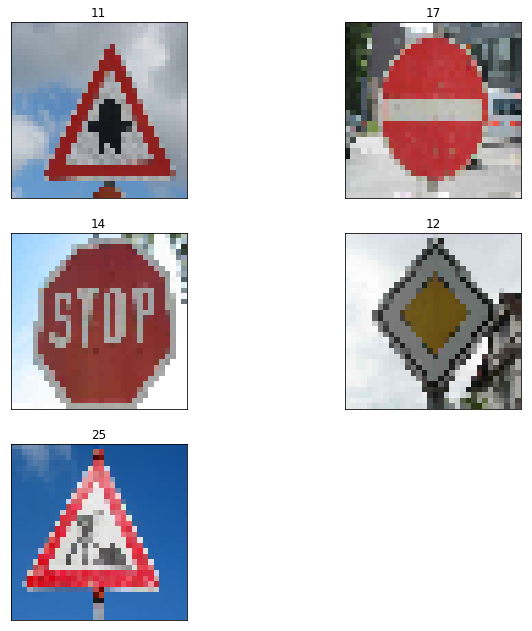

In [13]:
import matplotlib.image as mpimg
import cv2

image_paths = ["100_1607.jpg", "Do-Not-Enter.jpg","stopsign.jpg", "Arterial.jpg", "road_work.jpg"]
X_image = np.array([cv2.cvtColor(cv2.resize(cv2.imread(p), (32,32)), cv2.COLOR_BGR2RGB) for p in image_paths])
y_image = np.array([11, 17, 14, 12, 25])

h = 3
w = 2


fig, axes = plt.subplots(h, w, figsize=(11,11))
for c in range(len(y_image)):
    i = X_image[c].squeeze()
    axes[int(c/w),c%w].imshow(i, cmap="gray")
    axes[int(c/w),c%w].set_title(y_image[c])
    axes[int(c/w),c%w].set_xticks([])
    axes[int(c/w),c%w].set_yticks([])

fig.delaxes(axes[2,1])


### Predict the Sign Type for Each Image

In [14]:
with tf.Session() as sess:
    saver.restore(sess, './inception-bn-10')
    
    feed_dict = {x: X_image, y: y_image, is_training: False}
    prediction_accuracy = evaluate(X_image, y_image)
    k = sess.run(logits, feed_dict=feed_dict)
    top = sess.run(tf.nn.top_k(logits, 3, sorted=False), feed_dict=feed_dict)
    print("Prediction Accuracy = {:.3f}".format(prediction_accuracy))

Prediction Accuracy = 0.800


### Analyze Performance

### Top 5 Softmax Probabilities For Each Image

In [17]:
with tf.Session() as sess:
    saver.restore(sess, './inception-bn-10')
    feed_dict = {x: X_image, y: y_image, is_training: False}
    prediction_accuracy = evaluate(X_image, y_image)
    top_k = sess.run(tf.nn.top_k(logits, 5, sorted=True), feed_dict=feed_dict)


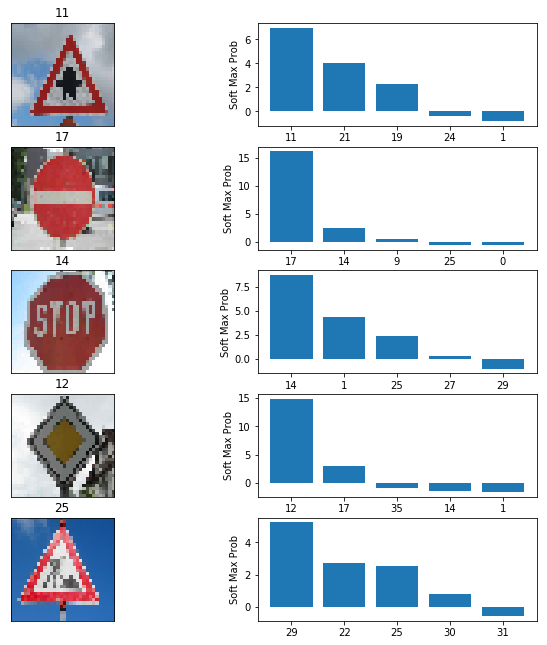

In [18]:
h = 5
w = 2

y_pos = np.arange(len(y_image))

fig, axes = plt.subplots(h, w, figsize=(11,11))
for ind in range(len(X_image)):
    
    i = X_image[ind].squeeze()
    axes[ind,0].imshow(i, cmap="gray")
    axes[ind,0].set_title(y_image[ind])
    axes[ind,0].set_xticks([])
    axes[ind,0].set_yticks([])
    
    axes[ind,1].bar(y_pos, top_k[0][ind])
    axes[ind,1].set_xticks(y_pos)
    axes[ind,1].set_xticklabels(top_k[1][ind])
    axes[ind,1].set_ylabel("Soft Max Prob")
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.